# **Group Exercises: Hot Jupiters**
###The aim of this exercise is to Review concepts of radial velocity through the exploration of a Hot Jupiter exoplanet. 

###You will be using several common python libraries in addition to Astronomy specific tools.

> *Instructions:*  Save a copy of this Colab notebook to your own Google Drive folder **adding your name to the filename** and open in Google Colaboratory. When you have completed the exercise you will need to upload a .pdf of the Colab notebook to canvas. Instructions on how to download a .pdf of this notebook are found at the end of the exercise.

> *Documentation:* Additional resources on how to use Google Colab, enter answers, view code, and which Python libaries are used can be found in the documentation file.

> Don't forget that you need to run every code block **including** the ones where you input information. This does not include *text blocks* where you are writing your answers. If you experience any issues, navigate to runtime in the menu bar and select 'Restart and run all'.

>    *Honor Statement:* Recall that your name on this worksheet is considered to be a reaffirmation of your commitment to the Dartmouth Honor Principle. No internet, phones, or calculators are allowed on these worksheets, although you may use your textbooks and notes. The are a total of 6 points.

---

## Group Members: *add your group members here by double clicking on this cell*.

___

## Last class, we discussed the first discovered exoplanet, which was found via pulsar timing. The first exoplanet detected around a main sequence star is 51 Peg b (Mayor & Queloz, 1995). The equation that describes the velocity of the star in response to the planet’s orbit (called the reflex velocity) is:

### $$v_{reflex}=28.4m/s \frac{M_psin \hspace{.1cm}i}{P_{orb}^{1/3}{M_*^{2/3}}}$$

## Where $i$ is the inclination of the orbit (90 degrees is edge-on), $M_P$ is the mass of the planet in Jupiter masses, $M_∗$ is the mass of the star in solar masses, and $P_{orb}$ is the orbital period of the system in years. **Do your work on a separate piece of paper and provide your answer in the cells below.**

## **1.** What is the reflex velocity of Jupiter orbiting the Sun? Note that $12^{1/3} ∼ 2.3$.

---

## **2.** What is the reflex velocity of Earth orbiting the Sun? Note that $M_{Earth} ∼ 1/300M_{Jup}.$

---

## **3.** Many spectrographs can regularly achieve a precision of 1 m/s, and hundreds of stars have been monitored for more than a decade. Taking into consideration these two facts, should astronomers be able to detect Jupiters around Sun-like stars using radial velocities? How about Earths around Sun-like stars using radial velocities?

---

## Now we will explore Mayor and Queloz 1995's observation. Below is a periodogram--a commonly used statistical tool designed to detect periodic signals in unevenly spaced observations.

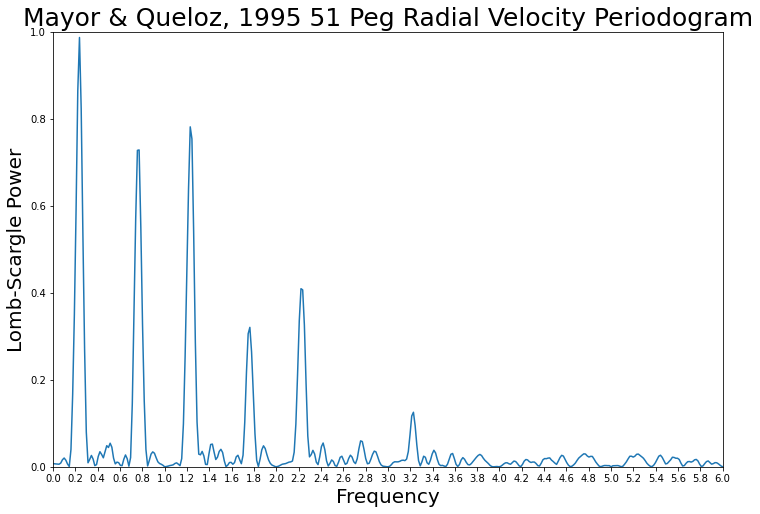

In [1]:
#@title  { vertical-output: true, display-mode: "form" }

# this block imports all the libraries and functions used in the exercise
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

# read in data from Mayor & Queloz 1995 into pandas dataframe
url = 'https://raw.githubusercontent.com/difuse-dartmouth/21w_ASTR15/main/Module_Data/51PegB_RV_data.csv'
df = pd.read_csv(url)
x_data = df['Day']
y_data = df['v (m/s)']
dy = np.full(shape=len(x_data), fill_value=6.5, dtype=np.int)

# set up the graphing figure
fig=plt.figure(figsize=(12,8))
ax=plt.gca()
ax.set_xlabel(r'Frequency', fontsize=20)
ax.set_ylabel(r'Lomb-Scargle Power', fontsize=20)
ax.set_title('Mayor & Queloz, 1995 51 Peg Radial Velocity Periodogram', fontsize=25)
ax.set_xlim(left=0)
ax.set_ylim(bottom=0)
plt.xticks(np.arange(0, 6.2, step=0.2))

# we use the Lomb-Scargle model from astropy to fit the data
from astropy.timeseries import LombScargle
# graph power v frequency periodogram
frequency, power = LombScargle(x_data, y_data, dy).autopower()
plt.plot(frequency, power)

plt.show()

## Please provide your estimate for the best frequency below. Your input will be used to fit a sinusodial curve to Mayor and Queloz's radial velocity observations. 

In [2]:
#@title  { vertical-output: true, display-mode: "form" }
frequency_input =  ""#@param {type:"string"}
try: 
  frequency_input = float(frequency_input)
except:
  print('Please provide a valid frequency input > 0. Rerun this cell and the one below.')

Please provide a valid frequency input > 0. Rerun this cell and the one below.


In [3]:
#@title  { vertical-output: true, display-mode: "form" }

# check input to make sure its a type float and greater than 0
if type(frequency_input) is float and frequency_input > 0:
  # set up the graphing figure
  fig=plt.figure(figsize=(12,8))
  ax=plt.gca()
  ax.set_xlabel(r'TIME (Julian Day)', fontsize=20)
  ax.set_ylabel(r'Radial Velocity (m/s)', fontsize=20)
  ax.set_title('51 Peg RV Graph', fontsize=25)
  ax.scatter(x_data, y_data, s=150, c='red')

  # we use the Lomb-Scargle periodogram to fit the data
  ls = LombScargle(x_data, y_data, dy)
  x_fit = np.linspace(0, x_data.max(), 100)
  y_fit = ls.model(x_fit, frequency_input)
  plt.plot(x_fit, y_fit,'--', c='black')
  plt.errorbar(x_data, y_data, 
              yerr=dy, fmt="o", c='red') 

  plt.show()
# else:
#   print('Please provide a valid frequency input > 0')

## As you can see, the model is *very* sensitive to frequency. Run the code block below to extract the frequency with the highest power automatically. Paste the output into the input field below.

In [4]:
print(frequency[np.argmax(power)])

0.23664122137404583


In [5]:
#@title  { vertical-output: true, display-mode: "form" }
best_frequency_input =  ""#@param {type:"string"}
try: 
  best_frequency_input = float(best_frequency_input)
except:
  print('Please provide a valid frequency input > 0. Rerun this cell and the one below.')

Please provide a valid frequency input > 0. Rerun this cell and the one below.


In [6]:
#@title  { vertical-output: true, display-mode: "form" }

# check input to make sure its a type float and greater than 0
if type(best_frequency_input) is float and best_frequency_input > 0:
  # set up the graphing figure
  fig=plt.figure(figsize=(12,8))
  ax=plt.gca()
  ax.set_xlabel(r'TIME (Julian Day)', fontsize=20)
  ax.set_ylabel(r'Radial Velocity (m/s)', fontsize=20)
  ax.set_title('51 Peg RV Graph', fontsize=25)
  ax.scatter(x_data, y_data, s=150, c='red')

  # we use the Lomb-Scargle periodogram to fit the data
  ls = LombScargle(x_data, y_data, dy)
  x_fit = np.linspace(0, x_data.max(), 100)
  y_fit = ls.model(x_fit, best_frequency_input)
  plt.plot(x_fit, y_fit,'--', c='black')
  plt.errorbar(x_data, y_data, 
              yerr=dy, fmt="o", c='red') 

  plt.show()

## **4.** Look up the paper by Mayor and Queloz presenting the discovery of 51 Peg b on ADS. This planet orbits a star similar to the Sun, which has a mass of 1.1 solar masses. What is the reflex velocity of 51 Peg? *You don’t need to calculate anything.*

---

## **5.** What is the planet’s period? 

---

## **6.** Assuming the planet is viewed edge-on (that is, i = 90), calculate the mass of the planet 51 Peg b. Verify your answer against the one in the paper.

---

## **7.** Based on what we discussed about planet formation, what makes the discovery of such a “hot Jupiter” surprising? What are some possibilities for the origin of hot Jupiters?

---

###**Downloading Instructions:** When your group has completed this exercise, download a .pdf of this notebook and upload it to Canvas. You can do this by going to File>Print>Destination>Save to PDF. 

> *Note:* you might have to play with the document scale (under More Settings) to ensure plots are not cut off. If you have difficulty producing the .pdf without errors try using a different web browser.